In [52]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [53]:
file_path = "../data/AB_NYC_2019.csv"

In [54]:
df = pd.read_csv(file_path)

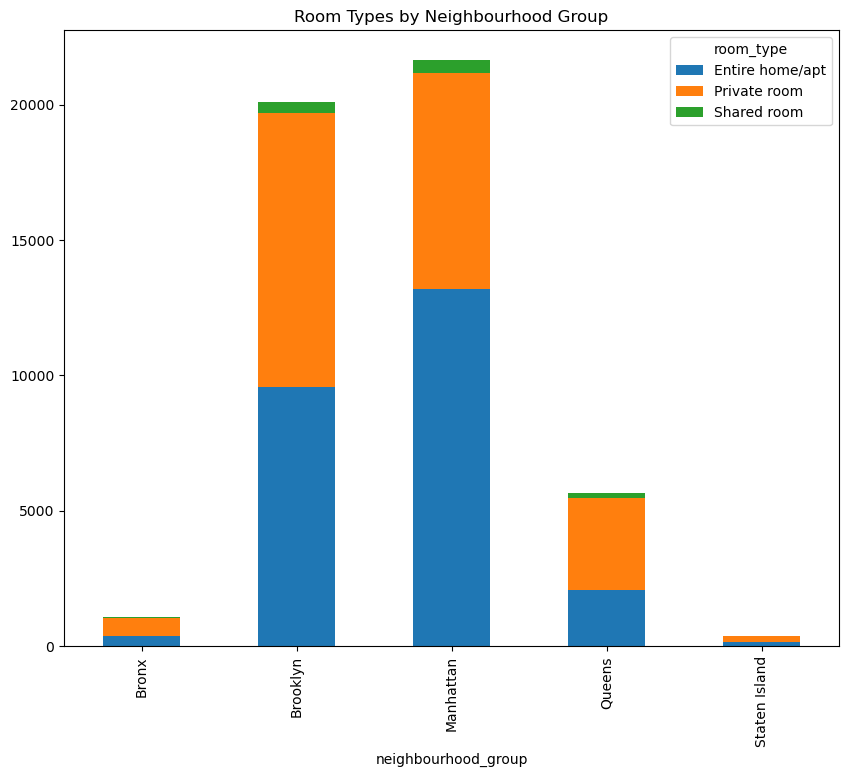

In [55]:
# We've looked at location and price, now let's look at the room types

# Let's create a stacked barplot of the room types by neighbourhood group

ax1 = df.groupby(['neighbourhood_group', 'room_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Room Types by Neighbourhood Group')
plt.show()

In [56]:
# Let's inspect the df
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


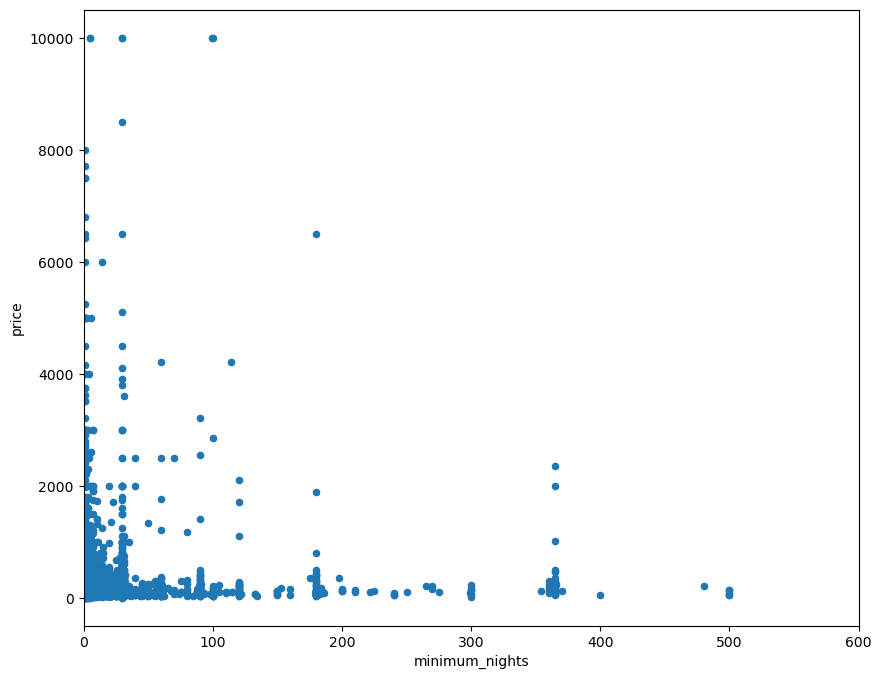

In [57]:
# Let's run linear regression on price and minimum nights

# First we'll simply make a scatter plot
ax1 = df.plot.scatter(x='minimum_nights', y='price', figsize=(10, 8))
# Set x-axis range to 0-600
plt.xlim(0, 600)
plt.show()

In [58]:
# Let's find the correlation coefficient
df[['minimum_nights', 'price']].corr()

,minimum_nights,price
minimum_nights,1.000000,0.042799
price,0.042799,1.000000


<Axes: xlabel='number_of_reviews', ylabel='price'>

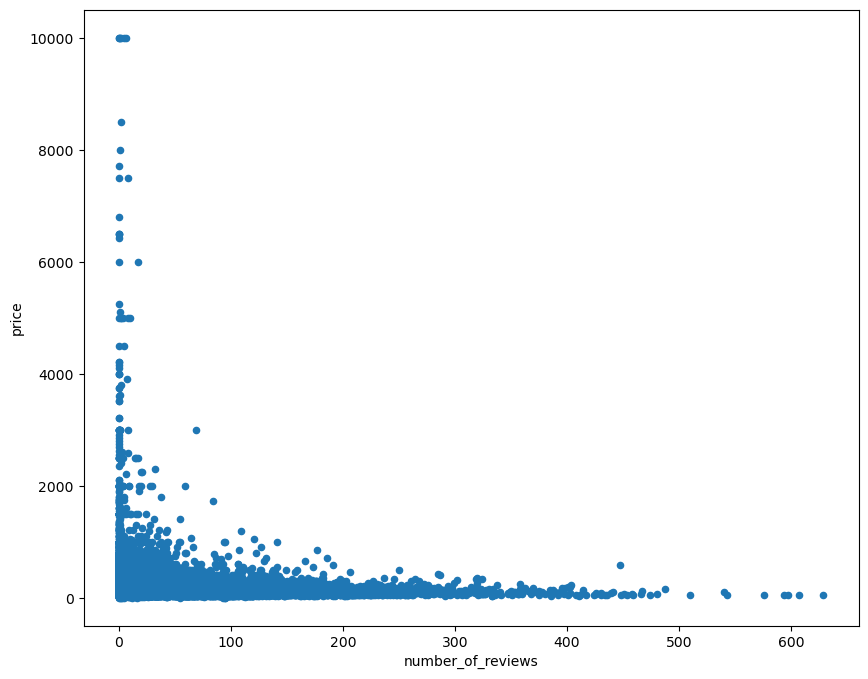

In [59]:
# Scatter plot price and number of reviews
df.plot.scatter(x='number_of_reviews', y='price', figsize=(10, 8))

In [60]:
# Let's find the correlation coefficient
corrCoef = df[['number_of_reviews', 'price']].corr()
corrCoef

,number_of_reviews,price
number_of_reviews,1.000000,-0.047954
price,-0.047954,1.000000


In [61]:
# ANOVA on neighbourhood group and price

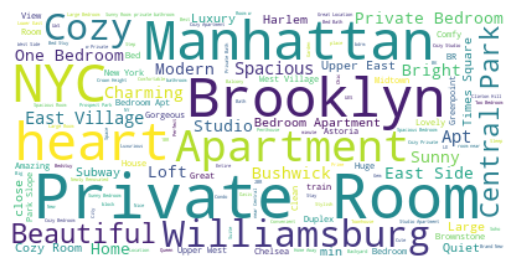

In [62]:
# Let's create a wordcloud of name for each neighbourhood group

# q: What package is best for word clouds?
# a: wordcloud

name = df['name'].dropna() # drop null values

text = ' '.join(name.astype(str).tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

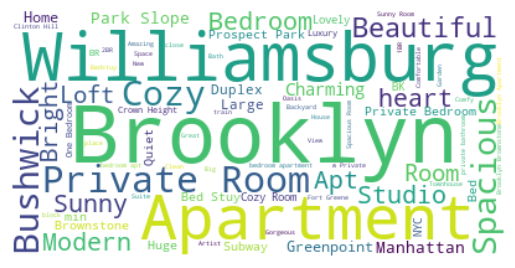

In [63]:
# Brooklyn
Brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']

Brooklyn_name = Brooklyn['name'].dropna() # drop null values

text = ' '.join(Brooklyn_name.astype(str).tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

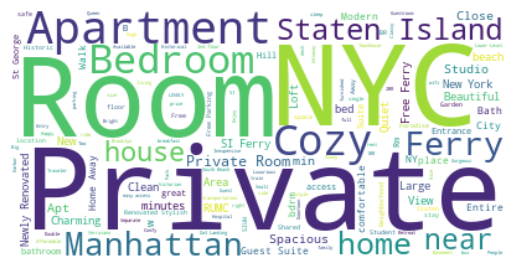

In [64]:
# Staten Island
Staten_Island = df[df['neighbourhood_group'] == 'Staten Island']

Staten_name = Staten_Island['name'].dropna() # drop null values

text = ' '.join(Staten_name.astype(str).tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

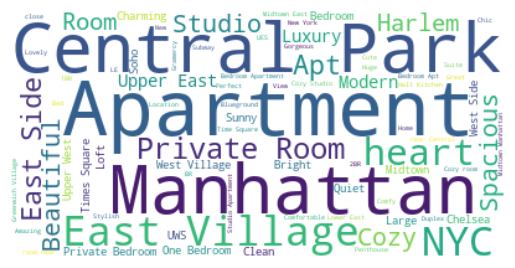

In [65]:
# Manhattan
Manhattan = df[df['neighbourhood_group'] == 'Manhattan']

Manhattan_name = Manhattan['name'].dropna() # drop null values

text = ' '.join(Manhattan_name.astype(str).tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

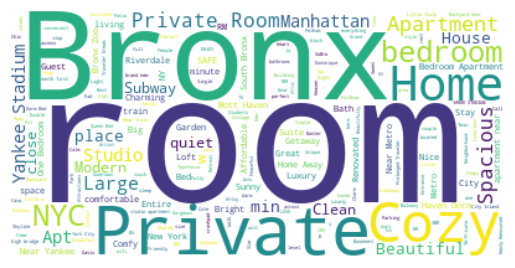

In [66]:
# Bronx
Bronx = df[df['neighbourhood_group'] == 'Bronx']

Bronx_name = Bronx['name'].dropna() # drop null values

text = ' '.join(Bronx_name.astype(str).tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

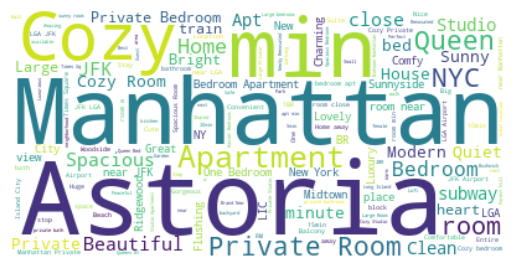

In [67]:
# Queens
Queens = df[df['neighbourhood_group'] == 'Queens']

Queens_name = Queens['name'].dropna() # drop null values

text = ' '.join(Queens_name.astype(str).tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

### Look at summary statistics to inform discussion of violin plot

In [68]:
# Get summary stats for all price data
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [69]:
df = df[df['price'] != 0]

In [70]:
df['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [71]:
under_500 = df[df['price'] < 500]
under_500['price'].describe()

count    47649.000000
mean       130.083926
std         85.074554
min         10.000000
25%         68.000000
50%        100.000000
75%        170.000000
max        499.000000
Name: price, dtype: float64

In [72]:
47659/48884

0.9749406758857704

In [78]:
# Get summary stats for price data for each neighbourhood group
Bronx['price'].median()

65.0

In [79]:
Manhattan['price'].median()

150.0

In [80]:
Staten_Island['price'].median()

75.0

In [81]:
Queens['price'].median()

75.0

In [82]:
Brooklyn['price'].median()

90.0